## How bad is the scaling estimate for $\Phi_{Tr}$ for profiles other than linear?

Comparison between estimated tracer flux onto the shelf through the canyon and the real deal.

$\Phi_{Tr}=\Phi \bar{C}$

where $\frac{\Phi}{WUD_h} = 0.9\mathcal{F}_w^{3/2}R_o^{1/2}(1-1.21S_E)^3+0.07$, $\mathcal{F}_w=R_w/(0.9+R_w)$, $R_w=U/fW$, $S_E=sN/f(\mathcal{F}_w/R_o)^{1/2}$.

And, $\bar{C}$ is 
$\frac{\bar{C}}{C_0}= 0.01\frac{\partial_zC}{2} (H_s+H_r) + 1.0$

where
$\frac{\partial_zC}{\partial_zC_0}= 4.17(1+\frac{Z+Z_{dif}}{H_s})-3.25$

and 

$Z_{dif}=(t(\kappa_{can}-\kappa_{bg}))^{1/2}$


In [1]:
import cmocean as cmo
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from netCDF4 import Dataset
import xarray as xr
import canyon_tools.readout_tools as rout
import canyon_tools.savitzky_golay as sg

In [2]:
sns.set_context('notebook')
sns.set_style('whitegrid')

In [3]:
# Constants and scales

# Constants and scales

L = 6400.0 # canyon length
R = 5000.0 # Upstream radius of curvature
g = 9.81 # accel. gravity
Wsb = 13000 # Width at shelf break
Hs = 147.5 # Shelf break depth
s = 0.005 # shelf slope 
W = 8300 # mid-length width
Hh = 97.5 # head depth
Hr = 132.0 # rim depth at DnS
No = 5.5E-3
f = 9.66E-5
kv = 1E-5
kbg = 1E-5
t = 6.5 # days
U = 0.36 # m/s

# NOTE: The default values of all functions correspond to the base case

def Dh(f=9.66E-4,L=6400.0,N=5.5E-3):
    '''Vertical scale Dh'''
    return((f*L)/(N))
    
def Ro(U=0.37,f=9.66E-4,R=5000.0):
    '''Rossby number using radius of curvature as length scale'''
    return(U/(f*R))

def F(Ro):
    '''Function that estimates the ability of the flow to follow isobaths'''
    return(Ro/(0.9+Ro))

def Bu(N=5.5E-3,f=9.66E-5,W=8300,Hs=150.0):
    '''Burger number'''
    return(N*Hs/(f*W))

def RossbyRad(N=5.5E-3,Hs=150.0,f=9.66E-4):
    '''1st Rossby radius of deformation'''
    return(N*Hs/f)


In [5]:
# Grid, state and tracers datasets of base case
grid_file = '/data/kramosmu/results/TracerExperiments/BARKLEY/run01/gridGlob.nc'
grid = xr.open_dataset(grid_file)

state_file = '/data/kramosmu/results/TracerExperiments/BARKLEY/run01/stateGlob.nc' 
state = xr.open_dataset(state_file)

ptracers_file = '/data/kramosmu/results/TracerExperiments/BARKLEY/run01/ptracersGlob.nc'

ptracers_file_parab = '/data/kramosmu/results/TracerExperiments/CNTDIFF_7Tr/run01/ptracersGlob.nc'

ptracers_fileNoC = '/data/kramosmu/results/TracerExperiments/BARKLEY/run02/ptracersGlob.nc'

time = state.variables['T']
depth = grid.variables['RC']

In [6]:
fileBAR = ('/data/kramosmu/results/TracerExperiments/BARKLEY/HCW_TrMass_BARKLEY_run01.csv')
fileBARNoC = ('/data/kramosmu/results/TracerExperiments/BARKLEY/HCW_TrMass_BARKLEY_run02.csv') 

fileLWR = ('/data/kramosmu/results/TracerExperiments/CNTDIFF_7Tr/HCW_TrMass_CNTDIFF_7Tr_run01.csv')
fileLWRNoC = ('/data/kramosmu/results/TracerExperiments/CNTDIFF_7Tr/HCW_TrMass_CNTDIFF_7Tr_run02.csv') 

dfBAR = pd.read_csv(fileBAR)
dfBARnoc = pd.read_csv(fileBARNoC)

dfLWR = pd.read_csv(fileLWR)
dfLWRnoc = pd.read_csv(fileLWRNoC)                

In [7]:
import canyon_records_tracers
records = canyon_records_tracers.main()

In [8]:
labels_Bark = ['Lin','Sal','Oxy','Nit','Sil','Pho','NitA','Met']
colours_Bark = ['purple','blue','green','gold','orange','red','orchid','teal']

labels_Para = ['Tr1','Tr2','Tr3','Tr4','Tr5','Tr6','Tr7']
colours_Para = ['tan','0.2','0.3','0.4','0.5','0.6','0.7'] 
sizes_Para = [11,7,7,7,7,7,7] 


(-180, -100)

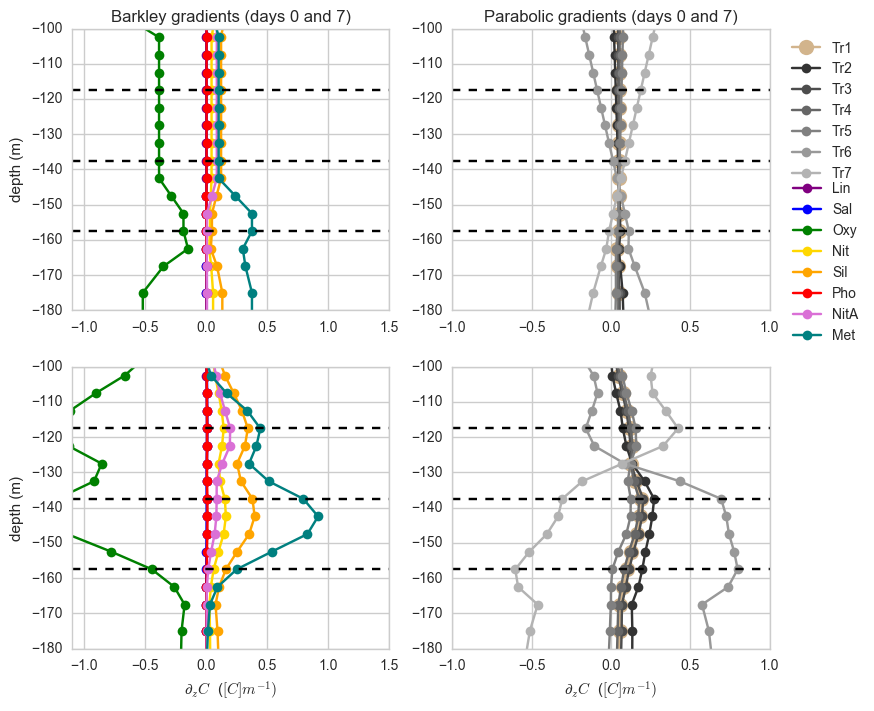

In [9]:
fig,[[ax1,ax2],[ax3,ax4]] = plt.subplots(2,2,figsize=(9,8))

-
    
ax3.set_xlabel('$\partial_z{C}$  ($[C]m^{-1})$')
ax3.set_ylabel('depth (m)')
ax1.set_ylabel('depth (m)')
ax1.set_title('Barkley gradients (days 0 and 7)')

ax4.set_xlabel('$\partial_z{C}$  ($[C]m^{-1})$')
ax2.set_title('Parabolic gradients (days 0 and 7)')

ax2.legend(bbox_to_anchor=(1.3,1),ncol=1, columnspacing=0.1)
ax1.legend(bbox_to_anchor=(2.52,0.5),ncol=1, columnspacing=0.1)

ax2.axhline(depth[23],linestyle='--',color='k')
ax1.axhline(depth[23],linestyle='--',color='k')
ax2.axhline(depth[27],linestyle='--',color='k')
ax1.axhline(depth[27],linestyle='--',color='k')
ax1.axhline(depth[31],linestyle='--',color='k')
ax2.axhline(depth[31],linestyle='--',color='k')
ax4.axhline(depth[23],linestyle='--',color='k')
ax3.axhline(depth[23],linestyle='--',color='k')
ax4.axhline(depth[27],linestyle='--',color='k')
ax3.axhline(depth[27],linestyle='--',color='k')
ax3.axhline(depth[31],linestyle='--',color='k')
ax4.axhline(depth[31],linestyle='--',color='k')

ax1.set_xlim(-1.1,1.5)
ax1.set_ylim(-180,-100)
ax2.set_xlim(-1,1)
ax2.set_ylim(-180,-100)
ax3.set_xlim(-1.1,1.5)
ax3.set_ylim(-180,-100)
ax4.set_xlim(-1,1)
ax4.set_ylim(-180,-100)

In [10]:
keys = ['Tr_profile_tt08','Tr_profile_tt10','Tr_profile_tt12','Tr_profile_tt14','Tr_profile_tt16']
key0 = 'Tr_profile_tt00'
stname = 'DnC' # Station at downstream side of canyon

Bar_maxTr = np.empty(8)
Bar_stdTr = np.empty(8)
Bar_TrSB = np.empty(8)
Bar_Ctop = np.empty(8)

Par_maxTr = np.empty(7)
Par_stdTr = np.empty(7)
Par_TrSB = np.empty(7)
Par_Ctop = np.empty(7)

record = records[0]
ii = 0
for tracer in record.tracerList:
    filename1 = ('/ocean/kramosmu/OutputAnalysis/outputanalysisnotebooks/results/metricsDataFrames/%s_profile_%s_%s.csv' 
                 % (tracer,record.name,stname))
    df = pd.read_csv(filename1)
    df_anom=(df.sub(df[key0].squeeze(),axis=0))
    maxd4 = np.mean(df[keys[0]][25:30])   
    maxd5 = np.mean(df[keys[1]][25:30])   
    maxd6 = np.mean(df[keys[2]][25:30]) 
    maxd7 = np.mean(df[keys[3]][25:30])  
    maxd8 = np.mean(df[keys[4]][25:30])  
    maxd0 = df[key0][29]
    
    
    Bar_maxTr[ii] = np.mean(np.array([maxd4,maxd5,maxd6,maxd7,maxd8]))
    Bar_stdTr[ii] = np.std(np.array([maxd4,maxd5,maxd6,maxd7,maxd8]))
    Bar_TrSB[ii] = maxd0
    Bar_Ctop[ii] = df[key0][0]
    ii=ii+1
    
record = records[1]
ii = 0
for tracer in record.tracerList:
    filename1 = ('/ocean/kramosmu/OutputAnalysis/outputanalysisnotebooks/results/metricsDataFrames/%s_profile_%s_%s.csv' 
                 % (tracer,record.name,stname))
    df = pd.read_csv(filename1)
    df_anom=(df.sub(df[key0].squeeze(),axis=0))
    maxd4 = np.mean(df[keys[0]][25:30])   
    maxd5 = np.mean(df[keys[1]][25:30])   
    maxd6 = np.mean(df[keys[2]][25:30]) 
    maxd7 = np.mean(df[keys[3]][25:30])  
    maxd8 = np.mean(df[keys[4]][25:30])  
    maxd0 = df[key0][29]
   
    
    Par_maxTr[ii] = np.mean(np.array([maxd4,maxd5,maxd6,maxd7,maxd8]))
    Par_stdTr[ii] = np.std(np.array([maxd4,maxd5,maxd6,maxd7,maxd8]))
    Par_TrSB[ii] = maxd0
    Par_Ctop[ii] = df[key0][0]
    ii=ii+1


In [11]:
Mass_Bark = ['TrMassHCW01','TrMassHCW02','TrMassHCW03','TrMassHCW04',
             'TrMassHCW05','TrMassHCW06','TrMassHCW07','TrMassHCW08']
Mass_Para = ['TrMassHCW01','TrMassHCW02','TrMassHCW03','TrMassHCW04',
             'TrMassHCW05','TrMassHCW06','TrMassHCW07']



In [12]:
Z = ((f*U*F(Ro(U,f,R))*L)**(0.5))/No
Zdif = np.sqrt(t*3600*24*(kv-kbg))
    
Se = (s*No)/(f*((F(Ro(U,f,W))/Ro(U,f,L))**(1/2)))
HA2013=(U*W*Dh(f,L,No))*((0.91*(F(Ro(U,f,W))**(3/2))*(Ro(U,f,L)**(1/2))*((1-1.21*Se)**3))+0.07)

## How well does the scaling do?

Tracer	Phi err (%)	C err (%)	dTr0	TrSB
Tr1 	10.8	6.3	0.050	13.6
Tr2 	14.0	1.1	0.059	13.6
Tr3 	11.4	5.4	0.051	13.6
Tr4 	10.3	7.2	0.049	13.6
Tr5 	7.7	11.2	0.043	13.6
Tr6 	28.0	18.7	0.113	13.6
Tr7 	18.7	0.8	-0.013	150.1
Lin 	18.8	0.4	0.002	32.2
Sal 	18.9	0.3	0.001	33.9
Oxy 	62.5	52.1	-0.186	104.1
Nit 	12.8	6.6	0.031	32.6
Sil 	9.0	10.3	0.047	47.6
Pho 	19.5	1.4	0.001	2.2
NitA 	14.2	5.0	0.007	27.7
Met 	26.3	47.3	0.375	17.5


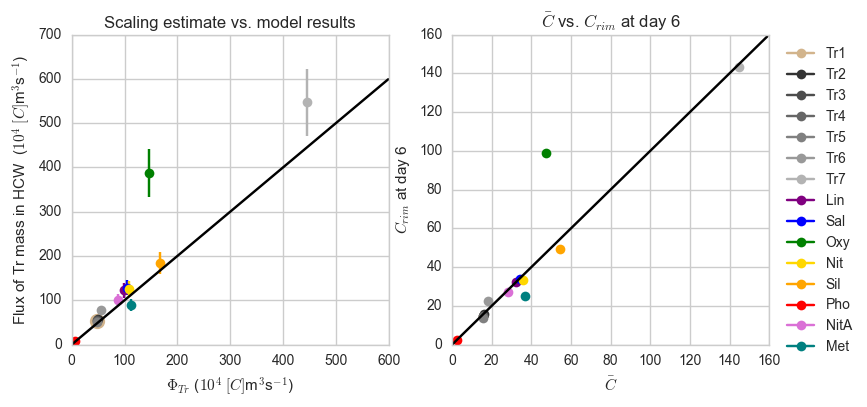

In [13]:
fig,[ax1,ax2] = plt.subplots(1,2,figsize=(9,4))

print ("\t".join(['Tracer', 'Phi err (%)', 'C err (%)', 'dTr0', 'TrSB']))

rec = records[0]

for TrMass, dTr0,Co,C, lab, col, ms in zip(Mass_Para,Par_inidTrdz[:],Par_TrSB[:],Par_maxTr[:],labels_Para,colours_Para,
                                           sizes_Para):
    
    mass_can_eff = dfLWR[TrMass]
    PhiTr = np.mean(np.array([(mass_can_eff[ii]-mass_can_eff[ii-1])/(time[ii]-time[ii-1]) for ii in range (8,15)]))
    PhiTr_std = np.std(np.array([(mass_can_eff[ii]-mass_can_eff[ii-1])/(time[ii]-time[ii-1]) for ii in range (8,15)]))
    dTrdz = -dTr0*(4.17*(1+((Z+Zdif)/Hs))-3.25)
    Capprox=((0.01*(dTrdz*(Hh+132.0)/2.0))+1.0)*Co
    scale_PhiTr = HA2013*Capprox
    ax1.errorbar(scale_PhiTr/1E4, PhiTr/1E4, yerr=PhiTr_std/1E4, color=col, label=lab, marker='o',markersize=ms)
    err_phi = scale_PhiTr/PhiTr
    ax2.plot(Capprox, C, color=col, label=lab, marker='o')
    err_C = Capprox/C
    
    print ("%s" % (lab), "\t".join(['\t%1.1f\t%1.1f\t%1.3f\t%1.1f' % (abs(1-err_phi)*100, abs(1-err_C)*100, -dTr0, Co)]))
    


for TrMass, dTr0, Co,C, lab, col in zip(Mass_Bark,Bar_inidTrdz,Bar_TrSB,Bar_maxTr,labels_Bark,colours_Bark):
    
    mass_can_eff = dfBAR[TrMass]
    
    PhiTr = np.mean(np.array([(mass_can_eff[ii]-mass_can_eff[ii-1])/(time[ii]-time[ii-1]) for ii in range (8,15)]))
    PhiTr_std = np.std(np.array([(mass_can_eff[ii]-mass_can_eff[ii-1])/(time[ii]-time[ii-1]) for ii in range (8,15)]))
    
    dTrdz = -dTr0*(4.17*(1+((Z+Zdif)/Hs))-3.25)
    Capprox=((0.01*(dTrdz*(Hh+132.0)/2.0))+1.0)*Co
    scale_PhiTr = HA2013*Capprox
    ax1.errorbar(scale_PhiTr/1E4, PhiTr/1E4, yerr=PhiTr_std/1E4, color=col, label=lab, marker='o')
    err_phi = scale_PhiTr/PhiTr
    ax2.plot(Capprox, C, color=col, label=lab, marker='o')
    err_C = Capprox/C
    print ("%s" % (lab), "\t".join(['\t%1.1f\t%1.1f\t%1.3f\t%1.1f' % (abs(1-err_phi)*100, abs(1-err_C)*100, -dTr0, Co)]))
   

   
ax1.set_xlabel(r'$\Phi_{Tr}$ ($10^4$ $[C]$m$^{3}$s$^{-1}$)')
ax1.set_ylabel('Flux of Tr mass in HCW  ($10^4$ $[C]$m$^{3}$s$^{-1}$)')
ax1.set_title('Scaling estimate vs. model results')
#ax1.set_ylim(0,500)
#ax1.set_xlim(0,500)
ax1.plot(np.arange(0,600,1),np.arange(0,600,1),'-k')

ax2.legend(bbox_to_anchor=(1.3,1),ncol=1, columnspacing=0.1)
ax2.set_xlabel(r'$\bar{C}$')
ax2.set_ylabel('$C_{rim}$ at day 6')
ax2.set_title(r'$\bar{C}$ vs. $C_{rim}$ at day 6')
ax2.plot(np.arange(0,160,1),np.arange(0,160,1),'-k')

(0, 55)

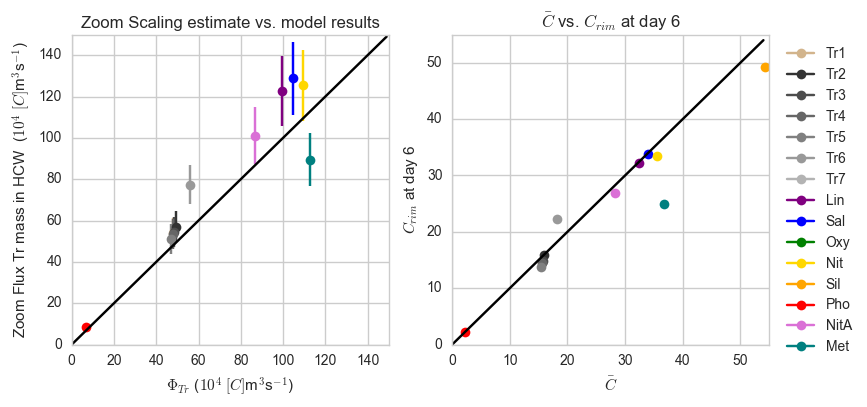

In [14]:
fig,[ax1,ax2] = plt.subplots(1,2,figsize=(9,4))

for TrMass, dTr0,Co,C, lab, col in zip(Mass_Para,Par_inidTrdz[:],Par_TrSB[:],Par_maxTr[:],labels_Para,colours_Para):
    
    mass_can_eff = dfLWR[TrMass]
    PhiTr = np.mean(np.array([(mass_can_eff[ii]-mass_can_eff[ii-1])/(time[ii]-time[ii-1]) for ii in range (8,15)]))
    PhiTr_std = np.std(np.array([(mass_can_eff[ii]-mass_can_eff[ii-1])/(time[ii]-time[ii-1]) for ii in range (8,15)]))
    
    dTrdz = -dTr0*(4.17*(1+((Z+Zdif)/Hs))-3.25)
    Capprox=((0.01*(dTrdz*(Hh+132.0)/2.0))+1.0)*Co
    scale_PhiTr = HA2013*Capprox
    ax1.errorbar(scale_PhiTr/1E4, PhiTr/1E4, yerr=PhiTr_std/1E4, color=col, label=lab, marker='o')
    ax2.plot(Capprox, C, color=col, label=lab, marker='o')

for TrMass, dTr0, Co,C, lab, col in zip(Mass_Bark,Bar_inidTrdz,Bar_TrSB,Bar_maxTr,labels_Bark,colours_Bark):
    
    mass_can_eff = dfBAR[TrMass]
    PhiTr = np.mean(np.array([(mass_can_eff[ii]-mass_can_eff[ii-1])/(time[ii]-time[ii-1]) for ii in range (8,15)]))
    PhiTr_std = np.std(np.array([(mass_can_eff[ii]-mass_can_eff[ii-1])/(time[ii]-time[ii-1]) for ii in range (8,15)]))
    
    dTrdz = -dTr0*(4.17*(1+((Z+Zdif)/Hs))-3.25)
    Capprox=((0.01*(dTrdz*(Hh+132.0)/2.0))+1.0)*Co
    scale_PhiTr = HA2013*Capprox
    
    ax1.errorbar(scale_PhiTr/1E4, PhiTr/1E4, yerr=PhiTr_std/1E4, color=col, label=lab, marker='o')
    ax2.plot(Capprox, C, color=col, label=lab, marker='o')

ax1.set_xlabel(r'$\Phi_{Tr}$ ($10^4$ $[C]$m$^{3}$s$^{-1}$)')
ax1.set_ylabel('Zoom Flux Tr mass in HCW  ($10^4$ $[C]$m$^{3}$s$^{-1}$)')
ax1.set_title('Zoom Scaling estimate vs. model results')
ax1.set_ylim(0,150)
ax1.set_xlim(0,150)
ax1.plot(np.arange(0,150,1),np.arange(0,150,1),'-k')

ax2.legend(bbox_to_anchor=(1.3,1),ncol=1, columnspacing=0.1)
ax2.set_xlabel(r'$\bar{C}$')
ax2.set_ylabel('$C_{rim}$ at day 6')
ax2.set_title(r'$\bar{C}$ vs. $C_{rim}$ at day 6')
ax2.plot(np.arange(0,55,1),np.arange(0,55,1),'-k')
ax2.set_ylim(0,55)
ax2.set_xlim(0,55)


Tracer	Phi err (%)	C err (%)	dTr0	TrSB
Tr1 	10.8	6.3	0.050	13.6
Tr2 	14.0	1.1	0.059	13.6
Tr3 	11.4	5.4	0.051	13.6
Tr4 	10.3	7.2	0.049	13.6
Tr5 	7.7	11.2	0.043	13.6
Tr6 	28.0	18.7	0.113	13.6
Tr7 	18.7	0.8	-0.013	150.1
Lin 	18.8	0.4	0.002	32.2
Sal 	18.9	0.3	0.001	33.9
Oxy 	62.5	52.1	-0.186	104.1
Nit 	12.8	6.6	0.031	32.6
Sil 	9.0	10.3	0.047	47.6
Pho 	19.5	1.4	0.001	2.2
NitA 	14.2	5.0	0.007	27.7
Met 	26.3	47.3	0.375	17.5


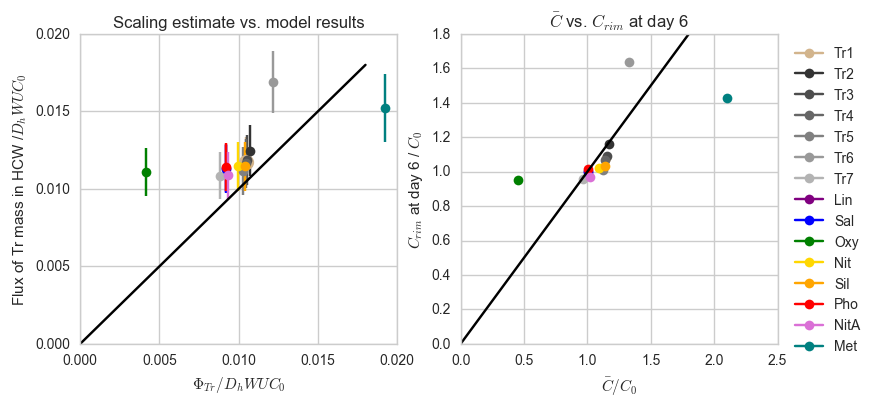

In [45]:
fig,[ax1,ax2] = plt.subplots(1,2,figsize=(9,4))

print ("\t".join(['Tracer', 'Phi err (%)', 'C err (%)', 'dTr0', 'TrSB']))

rec = records[0]

for TrMass, dTr0,Co,C, lab, col, ms in zip(Mass_Para,Par_inidTrdz[:],Par_TrSB[:],Par_maxTr[:],labels_Para,colours_Para,
                                           sizes_Para):
    
    mass_can_eff = dfLWR[TrMass]
    PhiTr = np.mean(np.array([(mass_can_eff[ii]-mass_can_eff[ii-1])/(time[ii]-time[ii-1]) for ii in range (8,15)]))
    PhiTr_std = np.std(np.array([(mass_can_eff[ii]-mass_can_eff[ii-1])/(time[ii]-time[ii-1]) for ii in range (8,15)]))
    dTrdz = -dTr0*(4.17*(1+((Z+Zdif)/Hs))-3.25)
    Capprox=((0.01*(dTrdz*(Hh+132.0)/2.0))+1.0)*Co
    
    scale_PhiTr = HA2013*Capprox/(Dh()*W*U*Co)
    ax1.errorbar(scale_PhiTr, PhiTr/(Dh()*W*U*Co), yerr=PhiTr_std/(Dh()*W*U*Co), 
                 color=col, label=lab, marker='o',markersize=ms)
    err_phi = scale_PhiTr/(PhiTr/(Dh()*W*U*Co))
    ax2.plot(Capprox/Co, C/Co, color=col, label=lab, marker='o')
    err_C = Capprox/C
    
    print ("%s" % (lab), "\t".join(['\t%1.1f\t%1.1f\t%1.3f\t%1.1f' % (abs(1-err_phi)*100, abs(1-err_C)*100, -dTr0, Co)]))
    


for TrMass, dTr0, Co,C, lab, col in zip(Mass_Bark,Bar_inidTrdz,Bar_TrSB,Bar_maxTr,labels_Bark,colours_Bark):
    
    mass_can_eff = dfBAR[TrMass]
    
    PhiTr = np.mean(np.array([(mass_can_eff[ii]-mass_can_eff[ii-1])/(time[ii]-time[ii-1]) for ii in range (8,15)]))
    PhiTr_std = np.std(np.array([(mass_can_eff[ii]-mass_can_eff[ii-1])/(time[ii]-time[ii-1]) for ii in range (8,15)]))
    
    dTrdz = -dTr0*(4.17*(1+((Z+Zdif)/Hs))-3.25)
    Capprox=((0.01*(dTrdz*(Hh+132.0)/2.0))+1.0)*Co
    scale_PhiTr = HA2013*Capprox/(Dh()*W*U*Co)
    ax1.errorbar(scale_PhiTr, PhiTr/(Dh()*W*U*Co), yerr=PhiTr_std/(Dh()*W*U*Co), 
                 color=col, label=lab, marker='o',markersize=ms)
    err_phi = scale_PhiTr/(PhiTr/(Dh()*W*U*Co))
    ax2.plot(Capprox/Co, C/Co, color=col, label=lab, marker='o')
    err_C = Capprox/C
    print ("%s" % (lab), "\t".join(['\t%1.1f\t%1.1f\t%1.3f\t%1.1f' % (abs(1-err_phi)*100, abs(1-err_C)*100, -dTr0, Co)]))
   

   
ax1.set_xlabel(r'$\Phi_{Tr}/D_hWUC_0$')
ax1.set_ylabel('Flux of Tr mass in HCW /$D_hWUC_0$')
ax1.set_title('Scaling estimate vs. model results')
#ax1.set_ylim(0,500)
#ax1.set_xlim(0,500)
ax1.plot(np.arange(0,0.02,0.002),np.arange(0,0.02,0.002),'k')

ax2.legend(bbox_to_anchor=(1.3,1),ncol=1, columnspacing=0.1)
ax2.set_xlabel(r'$\bar{C}/C_0$')
ax2.set_ylabel('$C_{rim}$ at day 6 / $C_0$')
ax2.set_title(r'$\bar{C}$ vs. $C_{rim}$ at day 6')
ax2.plot(np.arange(0,2,0.2),np.arange(0,2,0.2),'-k')

Form this plot with a gigantic scale it is clear that our scaling does a pretty bad approximation for oxygen, methane (largest negative curvature) for both tracer flux and concentration near the rim. Also, the model comparison for concentration that I took ($C_{rim}$ at day 6) may not be very fair but it seems to be in good agreement of what happens for $\Phi_{Tr}$.

I will take the profiles that satisfy:

$$|(1-\frac{\Phi_{Tr}}{\Phi_{model}})|100\%\le 20\%$$

as cases where the model does a decent job (within 20\% of model result).
|
Oxygen is terrible because it decreases with depth and the scaling cannot deal with that so far.

Also, the flux is overestimated by the scaling, except for linear and salinity.

In general, cases where the scale for tracer transport fails has to do with the scaling failing to approximate the characteristic concentration. 

A curious thing is that scaling for the linear profile Tr1 fails. So the problem does not have to do with curvature but with the initial vertical gradient. Scaling for the characteristic concentration gets worse with increasing $\partial_zCo$. Maybe what is important is how different is the initial tracer profile form the initial density profile. See next plot. 

## Scaling performs worse with increasing initial vertical gradient (?)

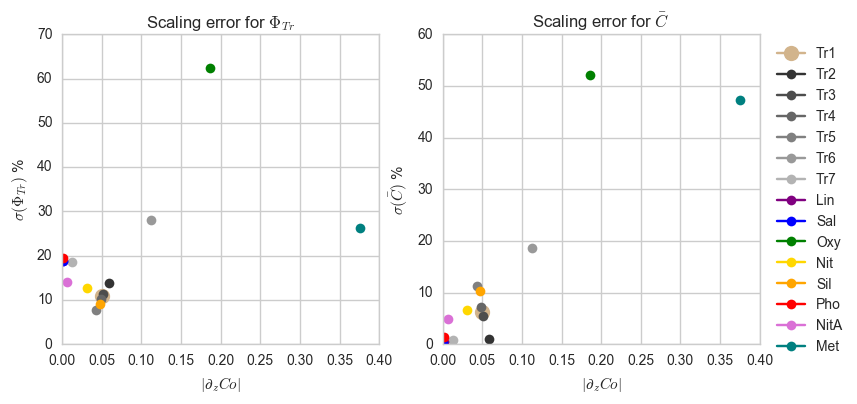

In [15]:
fig,[ax1,ax2] = plt.subplots(1,2,figsize=(9,4))

rec = records[0]

for TrMass, dTr0,Co,C, lab, col, ms in zip(Mass_Para,Par_inidTrdz[:],Par_TrSB[:],Par_maxTr[:],labels_Para,colours_Para,
                                           sizes_Para):
    
    mass_can_eff = dfLWR[TrMass]
    PhiTr = np.mean(np.array([(mass_can_eff[ii]-mass_can_eff[ii-1])/(time[ii]-time[ii-1]) for ii in range (8,15)]))
    PhiTr_std = np.std(np.array([(mass_can_eff[ii]-mass_can_eff[ii-1])/(time[ii]-time[ii-1]) for ii in range (8,15)]))
    dTrdz = -dTr0*(4.17*(1+((Z+Zdif)/Hs))-3.25)
    Capprox=((0.01*(dTrdz*(Hh+132.0)/2.0))+1.0)*Co
    scale_PhiTr = HA2013*Capprox
    err_phi = scale_PhiTr/PhiTr
    ax1.plot(abs(-dTr0),(abs(1-err_phi))*100 , color=col, label=lab, marker='o', markersize=ms)
    err_C = Capprox/C
    ax2.plot(abs(-dTr0), abs(1-err_C)*100, color=col, label=lab, marker='o', markersize=ms)
    
  

for TrMass, dTr0, Co,C, lab, col in zip(Mass_Bark,Bar_inidTrdz,Bar_TrSB,Bar_maxTr,labels_Bark,colours_Bark):
    
    mass_can_eff = dfBAR[TrMass]
    PhiTr = np.mean(np.array([(mass_can_eff[ii]-mass_can_eff[ii-1])/(time[ii]-time[ii-1]) for ii in range (8,15)]))
    PhiTr_std = np.std(np.array([(mass_can_eff[ii]-mass_can_eff[ii-1])/(time[ii]-time[ii-1]) for ii in range (8,15)]))
    dTrdz = -dTr0*(4.17*(1+((Z+Zdif)/Hs))-3.25)
    Capprox=((0.01*(dTrdz*(Hh+132.0)/2.0))+1.0)*Co
    scale_PhiTr = HA2013*Capprox
    err_phi = scale_PhiTr/PhiTr
    ax1.plot(abs(-dTr0),(abs(1-err_phi))*100 , color=col, label=lab, marker='o')
    err_C = Capprox/C
    ax2.plot(abs(-dTr0), abs(1-err_C)*100, color=col, label=lab, marker='o')
    

   
ax1.set_xlabel(r'$|\partial_zCo|$')
ax1.set_ylabel('$\sigma(\Phi_{Tr})$ %')
ax1.set_title('Scaling error for $\Phi_{Tr}$')
#ax1.set_ylim(0,500)
#ax1.set_xlim(0,500)

ax2.legend(bbox_to_anchor=(1.3,1),ncol=1, columnspacing=0.1)
ax2.set_xlabel(r'$|\partial_zCo|$')
ax2.set_ylabel(r'$\sigma(\bar{C})$ %')
ax2.set_title(r'Scaling error for $\bar{C}$')


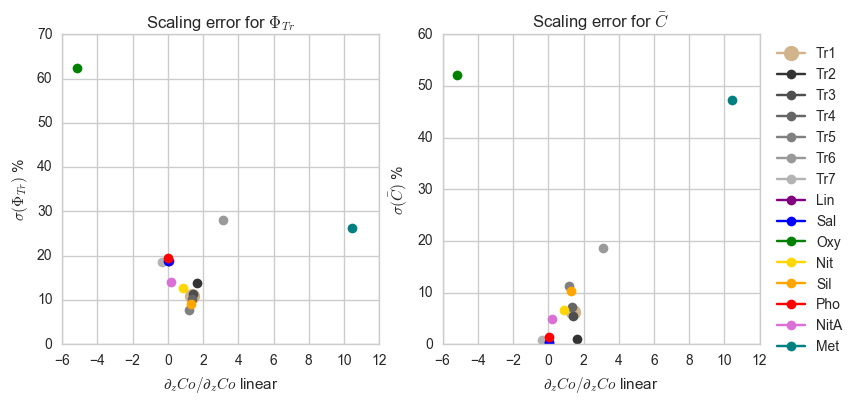

In [16]:
fig,[ax1,ax2] = plt.subplots(1,2,figsize=(9,4))

dTr0_linear = 0.035983
rec = records[0]

for TrMass, dTr0,Co,C, lab, col, ms in zip(Mass_Para,Par_inidTrdz[:],Par_TrSB[:],Par_maxTr[:],labels_Para,colours_Para,
                                           sizes_Para):
    
    mass_can_eff = dfLWR[TrMass]
    PhiTr = np.mean(np.array([(mass_can_eff[ii]-mass_can_eff[ii-1])/(time[ii]-time[ii-1]) for ii in range (8,15)]))
    PhiTr_std = np.std(np.array([(mass_can_eff[ii]-mass_can_eff[ii-1])/(time[ii]-time[ii-1]) for ii in range (8,15)]))
    dTrdz = -dTr0*(4.17*(1+((Z+Zdif)/Hs))-3.25)
    Capprox=((0.01*(dTrdz*(Hh+132.0)/2.0))+1.0)*Co
    scale_PhiTr = HA2013*Capprox
    err_phi = scale_PhiTr/PhiTr
    ax1.plot((-dTr0)/dTr0_linear,(abs(1-err_phi))*100 , color=col, label=lab, marker='o', markersize=ms)
    err_C = Capprox/C
    ax2.plot((-dTr0)/dTr0_linear, abs(1-err_C)*100, color=col, label=lab, marker='o', markersize=ms)
    
  

for TrMass, dTr0, Co,C, lab, col in zip(Mass_Bark,Bar_inidTrdz,Bar_TrSB,Bar_maxTr,labels_Bark,colours_Bark):
    
    mass_can_eff = dfBAR[TrMass]
    PhiTr = np.mean(np.array([(mass_can_eff[ii]-mass_can_eff[ii-1])/(time[ii]-time[ii-1]) for ii in range (8,15)]))
    PhiTr_std = np.std(np.array([(mass_can_eff[ii]-mass_can_eff[ii-1])/(time[ii]-time[ii-1]) for ii in range (8,15)]))
    dTrdz = -dTr0*(4.17*(1+((Z+Zdif)/Hs))-3.25)
    Capprox=((0.01*(dTrdz*(Hh+132.0)/2.0))+1.0)*Co
    scale_PhiTr = HA2013*Capprox
    err_phi = scale_PhiTr/PhiTr
    ax1.plot((-dTr0)/dTr0_linear,(abs(1-err_phi))*100 , color=col, label=lab, marker='o')
    err_C = Capprox/C
    ax2.plot((-dTr0)/dTr0_linear, abs(1-err_C)*100, color=col, label=lab, marker='o')
    

   
ax1.set_xlabel(r'$\partial_zCo/\partial_zCo$ linear')
ax1.set_ylabel('$\sigma(\Phi_{Tr})$ %')
ax1.set_title('Scaling error for $\Phi_{Tr}$')
#ax1.set_ylim(0,500)
#ax1.set_xlim(0,500)

ax2.legend(bbox_to_anchor=(1.3,1),ncol=1, columnspacing=0.1)
ax2.set_xlabel(r'$\partial_zCo/\partial_zCo$ linear')
ax2.set_ylabel(r'$\sigma(\bar{C})$ %')
ax2.set_title(r'Scaling error for $\bar{C}$')


(-1, 4)

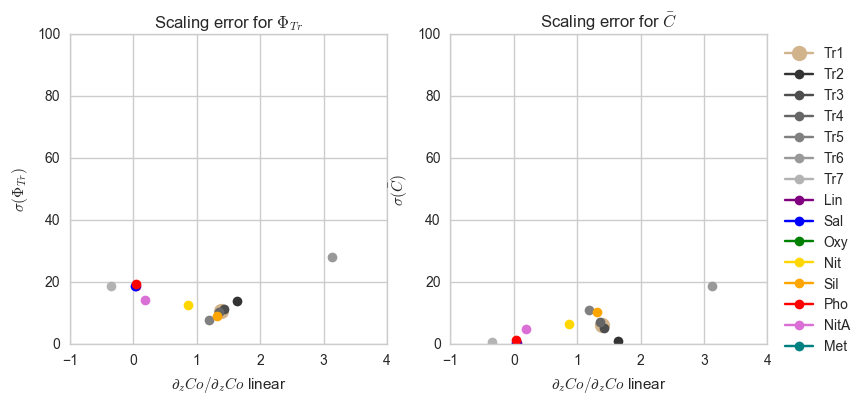

In [17]:
fig,[ax1,ax2] = plt.subplots(1,2,figsize=(9,4))

rec = records[0]

for TrMass, dTr0,Co,C, lab, col, ms in zip(Mass_Para,Par_inidTrdz[:],Par_TrSB[:],Par_maxTr[:],labels_Para,colours_Para,
                                           sizes_Para):
    
    mass_can_eff = dfLWR[TrMass]
    PhiTr = np.mean(np.array([(mass_can_eff[ii]-mass_can_eff[ii-1])/(time[ii]-time[ii-1]) for ii in range (8,15)]))
    PhiTr_std = np.std(np.array([(mass_can_eff[ii]-mass_can_eff[ii-1])/(time[ii]-time[ii-1]) for ii in range (8,15)]))
    dTrdz = -dTr0*(4.17*(1+((Z+Zdif)/Hs))-3.25)
    Capprox=((0.01*(dTrdz*(Hh+132.0)/2.0))+1.0)*Co
    scale_PhiTr = HA2013*Capprox
    err_phi = scale_PhiTr/PhiTr
    ax1.plot((-dTr0)/dTr0_linear,(abs(1-err_phi))*100 , color=col, label=lab, marker='o', markersize=ms)
    err_C = Capprox/C
    ax2.plot((-dTr0)/dTr0_linear, abs(1-err_C)*100, color=col, label=lab, marker='o', markersize=ms)
    
for TrMass, dTr0, Co,C, lab, col in zip(Mass_Bark,Bar_inidTrdz,Bar_TrSB,Bar_maxTr,labels_Bark,colours_Bark):
    
    mass_can_eff = dfBAR[TrMass]
    PhiTr = np.mean(np.array([(mass_can_eff[ii]-mass_can_eff[ii-1])/(time[ii]-time[ii-1]) for ii in range (8,15)]))
    PhiTr_std = np.std(np.array([(mass_can_eff[ii]-mass_can_eff[ii-1])/(time[ii]-time[ii-1]) for ii in range (8,15)]))
    dTrdz = -dTr0*(4.17*(1+((Z+Zdif)/Hs))-3.25)
    Capprox=((0.01*(dTrdz*(Hh+132.0)/2.0))+1.0)*Co
    scale_PhiTr = HA2013*Capprox
    err_phi = scale_PhiTr/PhiTr
    ax1.plot((-dTr0)/dTr0_linear,(abs(1-err_phi))*100 , color=col, label=lab, marker='o')
    err_C = Capprox/C
    ax2.plot((-dTr0)/dTr0_linear, abs(1-err_C)*100, color=col, label=lab, marker='o')

ax1.set_xlabel(r'$\partial_zCo/\partial_zCo$ linear')
ax1.set_ylabel('$\sigma(\Phi_{Tr})$')
ax1.set_title('Scaling error for $\Phi_{Tr}$')
ax1.set_ylim(0,100)
ax1.set_xlim(-1,4)

ax2.legend(bbox_to_anchor=(1.3,1),ncol=1, columnspacing=0.1)
ax2.set_xlabel(r'$\partial_zCo/\partial_zCo$ linear')
ax2.set_ylabel(r'$\sigma(\bar{C})$')
ax2.set_title(r'Scaling error for $\bar{C}$')
ax2.set_ylim(0,100)
ax2.set_xlim(-1,4)


It is pretty clear that my scaling is now working for larger initial vertical gradients. Still, why is the error in parabolic tracers decreasing with  the initial vertical gradient? Is it the curvature? Whn normalized by the initail tracer gradient i used for the runs in paper 1 I find that the profile with most similar initial gradient to the linear profiles (Nitrate) is not the one that has the smallest error.

I need to find out which one am I getting wrong, the squeezing/stretching ($\partial_zC$) or the linear approximation to get $\bar{C}$? or is it the curvature?

(-180, -100)

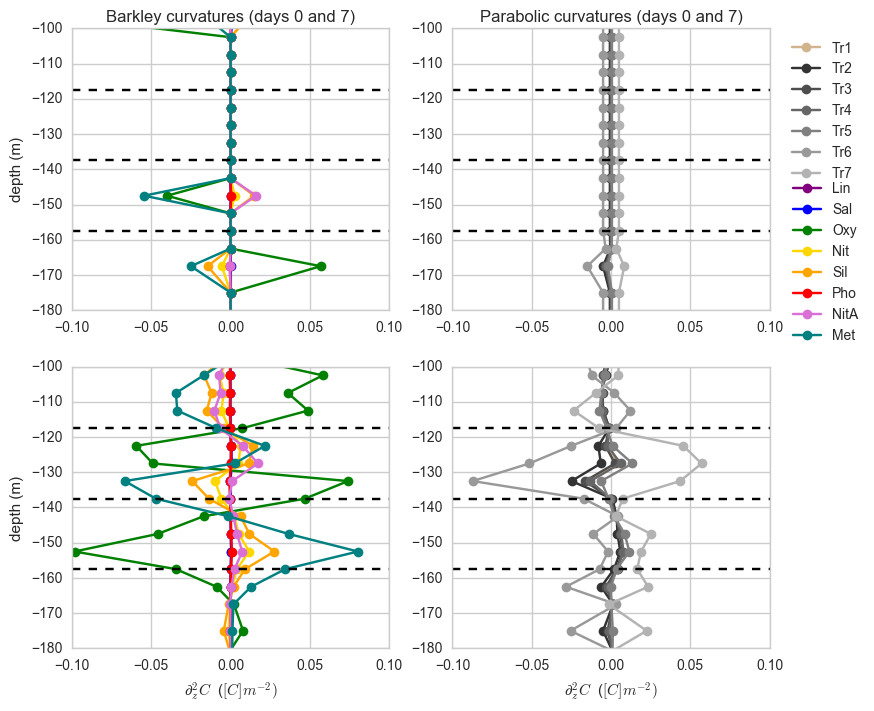

In [18]:
fig,[[ax1,ax2],[ax3,ax4]] = plt.subplots(2,2,figsize=(9,8))

keys = ['dTr2dz2_tt08','dTr2dz2_tt10','dTr2dz2_tt12','dTr2dz2_tt14','dTr2dz2_tt16']
key0 = 'dTr2dz2_tt00'
stname = 'DnC' # Station at downstream side of canyon

Bar_dTr2dz2 = np.empty(8)
Bar_inidTr2dz2 = np.empty(8)
Bar_dTr2dz2_std = np.empty(8)
       
Par_dTr2dz2 = np.empty(7)
Par_inidTr2dz2 = np.empty(7)
Par_dTr2dz2_std = np.empty(8)

record = records[0]
ii = 0
for tracer,col,lab in zip(record.tracerList, colours_Bark, labels_Bark):
    filename1 = ('/ocean/kramosmu/OutputAnalysis/outputanalysisnotebooks/results/metricsDataFrames/dTr2dz2_Tr%s_%s_%s.csv' 
                     %(tracer,record.name,stname))
    df = pd.read_csv(filename1)

    df_anom=(df.sub(df[key0].squeeze(),axis=0)).add(df[key0][0])

    maxd3 = min(df_anom[keys[0]][22:26])   
    maxd4 = min(df_anom[keys[1]][22:26])   
    maxd5 = min(df_anom[keys[2]][22:26])   
    maxd6 = min(df_anom[keys[3]][22:26])   
    maxd7 = min(df_anom[keys[4]][22:26])   
    
    ax1.plot(-df[key0][:],depth[1:-1],'o-',color=col,label=lab)
    ax3.plot(-df[keys[3]][:],depth[1:-1],'-o',color=col,label=lab)
    
    Bar_dTr2dz2[ii] = np.mean(np.array([maxd3,maxd4,maxd5,maxd6,maxd7]))
    Bar_inidTr2dz2[ii] = df[key0][30]
    Bar_dTr2dz2_std[ii] = np.std(np.array([maxd3,maxd4,maxd5,maxd6,maxd7]))
    ii = ii+1
    
record = records[1]
ii = 0
for tracer,col,lab in zip(record.tracerList, colours_Para, labels_Para):
    filename1 = ('/ocean/kramosmu/OutputAnalysis/outputanalysisnotebooks/results/metricsDataFrames/dTr2dz2_Tr%s_%s_%s.csv' 
                     %(tracer,record.name,stname))
    df = pd.read_csv(filename1)

    df_anom=(df.sub(df[key0].squeeze(),axis=0)).add(df[key0][0])

    maxd3 = min(df_anom[keys[0]][22:26])   
    maxd4 = min(df_anom[keys[1]][22:26])   
    maxd5 = min(df_anom[keys[2]][22:26])   
    maxd6 = min(df_anom[keys[3]][22:26])   
    maxd7 = min(df_anom[keys[4]][22:26])   
 
    ax2.plot(-df[key0][:],depth[1:-1],'o-',color=col,label=lab)
    ax4.plot(-df[keys[3]][:],depth[1:-1],'o-',color=col,label=lab)
    
    Par_dTr2dz2[ii] = np.mean(np.array([maxd3,maxd4,maxd5,maxd6,maxd7]))
    Par_inidTr2dz2[ii] = df[key0][30]
    Par_dTr2dz2_std[ii] = np.std(np.array([maxd3,maxd4,maxd5,maxd6,maxd7]))
   
    ii = ii+1
    
ax3.set_xlabel('$\partial_z^2{C}$  ($[C]m^{-2})$')
ax3.set_ylabel('depth (m)')
ax1.set_ylabel('depth (m)')
ax1.set_title('Barkley curvatures (days 0 and 7)')

ax4.set_xlabel('$\partial_z^2{C}$  ($[C]m^{-2})$')
ax2.set_title('Parabolic curvatures (days 0 and 7)')

ax2.legend(bbox_to_anchor=(1.3,1),ncol=1, columnspacing=0.1)
ax1.legend(bbox_to_anchor=(2.52,0.5),ncol=1, columnspacing=0.1)

ax2.axhline(depth[23],linestyle='--',color='k')
ax1.axhline(depth[23],linestyle='--',color='k')
ax2.axhline(depth[27],linestyle='--',color='k')
ax1.axhline(depth[27],linestyle='--',color='k')
ax1.axhline(depth[31],linestyle='--',color='k')
ax2.axhline(depth[31],linestyle='--',color='k')
ax4.axhline(depth[23],linestyle='--',color='k')
ax3.axhline(depth[23],linestyle='--',color='k')
ax4.axhline(depth[27],linestyle='--',color='k')
ax3.axhline(depth[27],linestyle='--',color='k')
ax3.axhline(depth[31],linestyle='--',color='k')
ax4.axhline(depth[31],linestyle='--',color='k')

ax1.set_xlim(-0.1,0.1)
ax1.set_ylim(-180,-100)
ax2.set_xlim(-0.1,0.1)
ax2.set_ylim(-180,-100)
ax3.set_xlim(-0.1,0.1)
ax3.set_ylim(-180,-100)
ax4.set_xlim(-0.1,0.1)
ax4.set_ylim(-180,-100)

## What is the problem, the squeezing or the linear approximation?

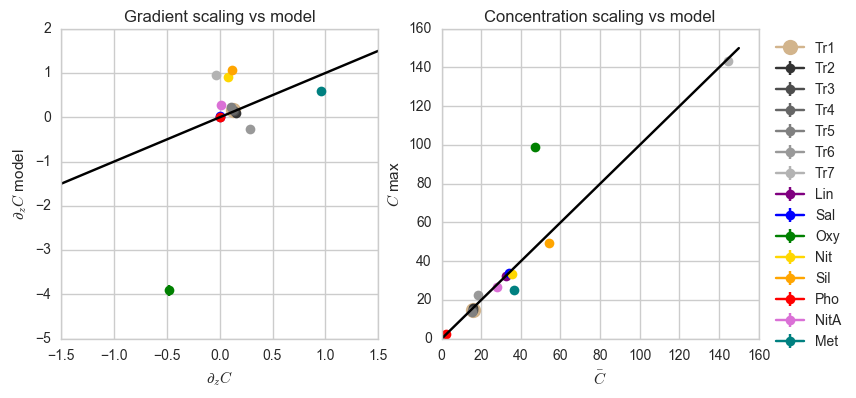

In [19]:
fig,[ax1,ax2] = plt.subplots(1,2,figsize=(9,4))

rec = records[0]

for dTrMod, dTr0, std, Co, C, stdTr, lab, col, ms in zip(Par_dTrdz,Par_inidTrdz,Par_dTrdz_std,Par_TrSB,Par_maxTr,
                                                         Par_stdTr,labels_Para,colours_Para,sizes_Para):
    
    dTrdz = -dTr0*(4.17*(1+((Z+Zdif)/Hs))-3.25)
    Capprox=((0.01*(dTrdz*(Hh+132.0)/2.0))+1.0)*Co
    ax1.errorbar(dTrdz, -dTrMod , yerr=std, color=col, label=lab, marker='o', markersize=ms)
    ax2.errorbar(Capprox, C, yerr=stdTr, color=col, label=lab, marker='o', markersize=ms)
    
for dTrMod, dTr0, std, Co, C, stdTr, lab, col in zip(Bar_dTrdz, Bar_inidTrdz,Bar_dTrdz_std,Bar_TrSB,Bar_maxTr,Bar_stdTr,
                                                     labels_Bark,colours_Bark):
    
    dTrdz = -dTr0*(4.17*(1+((Z+Zdif)/Hs))-3.25)
    Capprox=((0.01*(dTrdz*(Hh+132.0)/2.0))+1.0)*Co
    ax1.errorbar(dTrdz, -dTrMod, yerr=std, color=col, label=lab, marker='o')
    ax2.errorbar(Capprox, C, yerr=stdTr, color=col, label=lab, marker='o')
 

   
ax1.set_xlabel(r'$\partial_zC$')
ax1.set_ylabel('$\partial_zC$ model')
ax1.set_title('Gradient scaling vs model')
#ax1.set_ylim(0,80)
#ax1.set_xlim(-0.15,0.05)
ax1.plot(np.linspace(-1.5,1.5,100),np.linspace(-1.5,1.5,100),'-k')

ax2.legend(bbox_to_anchor=(1.3,1),ncol=1, columnspacing=0.1)
ax2.set_xlabel(r'$\bar{C}$')
ax2.set_ylabel(r'$C$ max')
ax2.set_title(r'Concentration scaling vs model')
#ax2.set_ylim(0,80)
#ax2.set_xlim(-0.15,0.05)
ax2.plot(np.linspace(0,150,100),np.linspace(0,150,100),'-k')


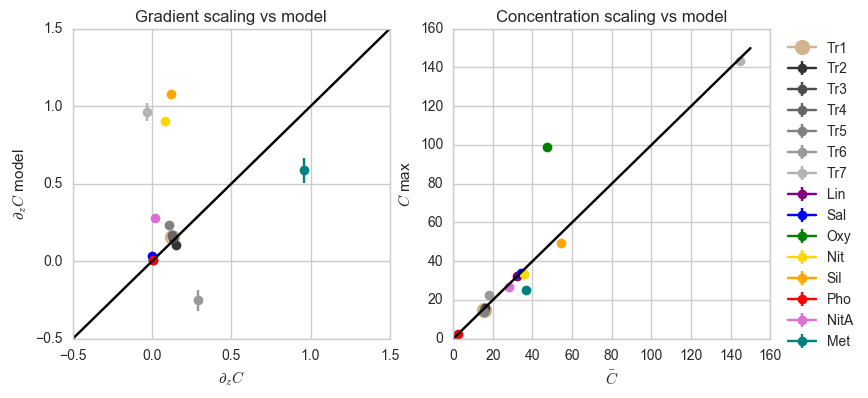

In [20]:
fig,[ax1,ax2] = plt.subplots(1,2,figsize=(9,4))

rec = records[0]

for dTrMod, dTr0, std, Co, C, stdTr, lab, col, ms in zip(Par_dTrdz,Par_inidTrdz,Par_dTrdz_std,Par_TrSB,Par_maxTr,Par_stdTr,
                                                     labels_Para,colours_Para,sizes_Para):
    
    dTrdz = -dTr0*(4.17*(1+((Z+Zdif)/Hs))-3.25)
    Capprox=((0.01*(dTrdz*(Hh+132.0)/2.0))+1.0)*Co
    ax1.errorbar(dTrdz, -dTrMod , yerr=std, color=col, label=lab, marker='o', markersize=ms)
    ax2.errorbar(Capprox, C, yerr=stdTr, color=col, label=lab, marker='o', markersize=ms)
    
for dTrMod, dTr0, std, Co, C, stdTr, lab, col in zip(Bar_dTrdz, Bar_inidTrdz,Bar_dTrdz_std,Bar_TrSB,Bar_maxTr,Bar_stdTr,
                                                     labels_Bark,colours_Bark):
    
    dTrdz = -dTr0*(4.17*(1+((Z+Zdif)/Hs))-3.25)
    Capprox=((0.01*(dTrdz*(Hh+132.0)/2.0))+1.0)*Co
    ax1.errorbar(dTrdz, -dTrMod, yerr=std, color=col, label=lab, marker='o')
    ax2.errorbar(Capprox, C, yerr=stdTr, color=col, label=lab, marker='o')
 

   
ax1.set_xlabel(r'$\partial_zC$')
ax1.set_ylabel('$\partial_zC$ model')
ax1.set_title('Gradient scaling vs model')
ax1.set_ylim(-0.5,1.5)
ax1.set_xlim(-0.5,1.5)
ax1.plot(np.linspace(-1.5,1.5,100),np.linspace(-1.5,1.5,100),'-k')

ax2.legend(bbox_to_anchor=(1.3,1),ncol=1, columnspacing=0.1)
ax2.set_xlabel(r'$\bar{C}$')
ax2.set_ylabel(r'$C$ max')
ax2.set_title(r'Concentration scaling vs model')
#ax2.set_ylim(0,150)
#ax2.set_xlim(0,150)
ax2.plot(np.linspace(0,150,100),np.linspace(0,150,100),'-k')


I am getting the right squeezing for the linear (Tr1), sal and Lin profiles which is great. The spread in the parabolic profiles is probaly due to the curvature (the ones with larger curvature are farther away from the 1:1 line). What I'm getting wrong with the parabolic profiles is the approx C.

I'm not getting the right graadient for Nit, Sil, Tr6, Tr7, NitA, Oxy, Met. NitA and Sil have a larger curvature between rim and shelf break than profiles that work. Met and oxy, Tr6 and Tr7 also satisfy this, and Nit a little bit. 


**The initial profile of the passive tracer I used in runs for paper 1 was 0.03598**

## Cross shelf concentration contours Barkley

In [21]:
def calc_rho(RhoRef,T,S,alpha=2.0E-4, beta=7.4E-4):
    """-----------------------------------------------------------------------------
    calc_rho calculates the density using a linear equation of state.
    
    INPUT:
    RhoRef : reference density at the same z as T and S slices. Can be a scalar or a 
             vector, depending on the size of T and S.
    T, S   : should be at least 2D arrays in coordinate order (..., Y , X ) 
    alpha = 2.0E-4 # 1/degC, thermal expansion coefficient
    beta = 7.4E-4, haline expansion coefficient
    OUTPUT:
    rho - Density [...,ny,nx]
    -----------------------------------------------------------------------------"""
    
    #Linear eq. of state 
    rho = RhoRef*(np.ones(np.shape(T)) - alpha*(T[...,:,:]) + beta*(S[...,:,:]))
    return rho



def call_rho(t,yslice,xslice):
    T = state.Temp.isel(T=t,Y=yslice,X=xslice)
    S = state.S.isel(T=t,Y=yslice,X=xslice)
    rho = calc_rho(RhoRef,T,S,alpha=2.0E-4, beta=7.4E-4)
    return(rho) 

RhoRef = 999.79998779 # It is constant in all my runs, can't run rdmds

Colormap is density (from 20 to 22 sigma), contours are concentration divided by initial C at shelf-break depth


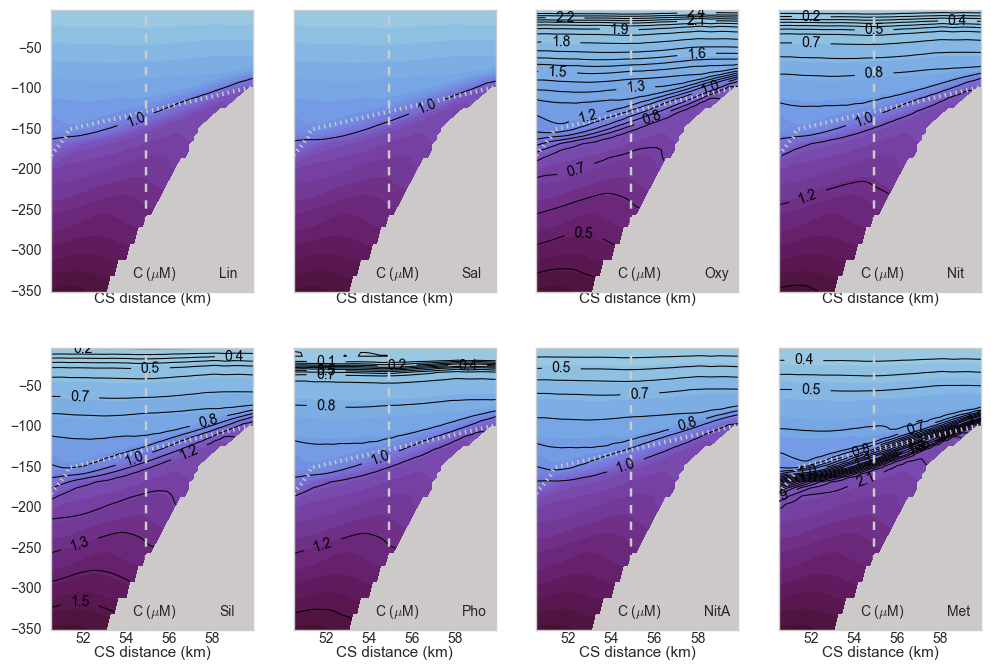

In [22]:
tracer_list = ['Tr01','Tr02','Tr03','Tr04','Tr05','Tr06','Tr07','Tr08'] # tracer list in Barkley run

hFacmasked = np.ma.masked_values(grid.HFacC.data, 0)
MaskC = np.ma.getmask(hFacmasked)

yslice = slice(220,270) 
xslice = 200             # x index of station DnS
tslice = slice(10,18)    # time slice during advective phase

density = call_rho(tslice,yslice,xslice)

fig ,ax = plt.subplots(2, 4, figsize = (12,8), sharey=True, sharex=True)

Tr_min = 0
Tr_max =3 
csU2 = np.linspace(Tr_min,Tr_max,num=40)

density = call_rho(tslice,yslice,xslice)
rho_min = 1020.4-1000.0
rho_max = 1022.0-1000.0 # 1022.4 if y=230,1021.4 if y=260
csU = np.linspace(rho_min,rho_max,num=30)

ax_list = [(0,0),(0,1),(0,2),(0,3),(1,0),(1,1),(1,2),(1,3)]

for tracer,label,jj in zip(tracer_list,labels_Bark,ax_list):
    
    with Dataset(ptracers_file, 'r') as nbl:
        trac = nbl.variables[tracer][tslice,:48,yslice,xslice]
        trac0 = nbl.variables[tracer][0,30,50,180]

    mesh = ax[jj].contourf(grid.Y[yslice]/1000,grid.Z[:48],
                           np.ma.array(np.nanmean(density[:,:48,:].data-1000,axis=0),
                                       mask=MaskC[:48,yslice,xslice]),
                           csU,cmap=cmo.cm.dense)
    
    CS = ax[jj].contour(grid.Y[yslice]/1000,grid.Z[:48],
                        (np.ma.array(np.nanmean(trac.data,axis=0),
                                       mask=MaskC[:48,yslice,xslice]))/trac0,
                        csU2,colors='k',linewidths=[0.75] )

    plt.clabel(CS,csU2[1::2], inline=1, fontsize=10,fmt='%1.1f')
    
    #cb = fig.colorbar(mesh,ax = ax[jj],ticks=[20.4,20.8,21.2,21.6,22],fmt='%d')
    #cb.ax.yaxis.set_tick_params(pad=1)

    ax[jj].plot(grid.Y[yslice]/1000,-grid.Depth[yslice,100],':',color='0.8',linewidth=3)
    
    ax[jj].set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))
    ax[jj].set_xlabel('CS distance (km)',labelpad=0.0)
    ax[jj].text(0.4,0.05,'C ($\mu$M)',transform=ax[jj].transAxes,fontsize=10)
    ax[jj].text(0.83,0.05,label,transform=ax[jj].transAxes,fontsize=10)
    ax[jj].tick_params(axis='x', pad=1.5)
    ax[jj].axvline(grid.Y[245]/1000,linestyle='--',color='0.8')


print('Colormap is density (from 20 to 22 sigma), contours are concentration divided by initial C at shelf-break depth')

Colormap is density (from 20 to 22 sigma), contours are concentration divided by initial profile


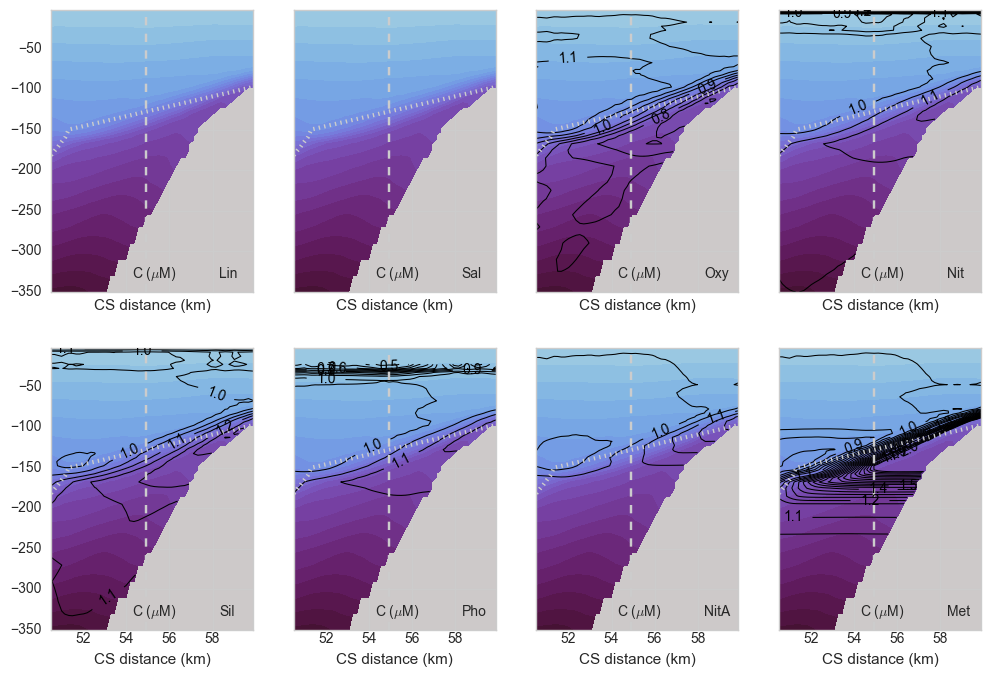

In [23]:
tracer_list = ['Tr01','Tr02','Tr03','Tr04','Tr05','Tr06','Tr07','Tr08'] # tracer list in Barkley run

hFacmasked = np.ma.masked_values(grid.HFacC.data, 0)
MaskC = np.ma.getmask(hFacmasked)

yslice = slice(220,270) 
xslice = 200             # x index of station DnS
tslice = slice(10,18)    # time slice during advective phase

density = call_rho(tslice,yslice,xslice)

fig ,ax = plt.subplots(2, 4, figsize = (12,8), sharey=True, sharex=True)

Tr_min = 0
Tr_max = 2 
csU2 = np.linspace(Tr_min,Tr_max,num=40)

density = call_rho(tslice,yslice,xslice)
rho_min = 1020.4-1000.0
rho_max = 1022.0-1000.0 # 1022.4 if y=230,1021.4 if y=260
csU = np.linspace(rho_min,rho_max,num=30)

ax_list = [(0,0),(0,1),(0,2),(0,3),(1,0),(1,1),(1,2),(1,3)]

for tracer,label,jj in zip(tracer_list,labels_Bark,ax_list):
    
    with Dataset(ptracers_file, 'r') as nbl:
        trac = nbl.variables[tracer][tslice,:48,yslice,xslice]
        trac0 = nbl.variables[tracer][0,:48,yslice,xslice]

    mesh = ax[jj].contourf(grid.Y[yslice]/1000,grid.Z[:48],
                           np.ma.array(np.nanmean(density[:,:48,:].data-1000,axis=0),
                                       mask=MaskC[:48,yslice,xslice]),
                           csU,cmap=cmo.cm.dense)
    
    CS = ax[jj].contour(grid.Y[yslice]/1000,grid.Z[:48],
                        (np.ma.array(np.nanmean(trac.data,axis=0),
                                       mask=MaskC[:48,yslice,xslice]))/trac0,
                        csU2,colors='k',linewidths=[0.75] )

    plt.clabel(CS,csU2[1::2], inline=1, fontsize=10,fmt='%1.1f')
    
    #cb = fig.colorbar(mesh,ax = ax[jj],ticks=[20.4,20.8,21.2,21.6,22],fmt='%d')
    #cb.ax.yaxis.set_tick_params(pad=1)

    ax[jj].plot(grid.Y[yslice]/1000,-grid.Depth[yslice,100],':',color='0.8',linewidth=3)
    
    ax[jj].set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))
    ax[jj].set_xlabel('CS distance (km)')
    ax[jj].text(0.4,0.05,'C ($\mu$M)',transform=ax[jj].transAxes,fontsize=10)
    ax[jj].text(0.83,0.05,label,transform=ax[jj].transAxes,fontsize=10)
    ax[jj].tick_params(axis='x', pad=1.5)
    ax[jj].axvline(grid.Y[245]/1000,linestyle='--',color='0.8')

print('Colormap is density (from 20 to 22 sigma), contours are concentration divided by initial profile')

Just to show lin and sal are changing very slowly with depth. Colormap is density (from 20 to 22 sigma), contours are concentration divided by initial profile


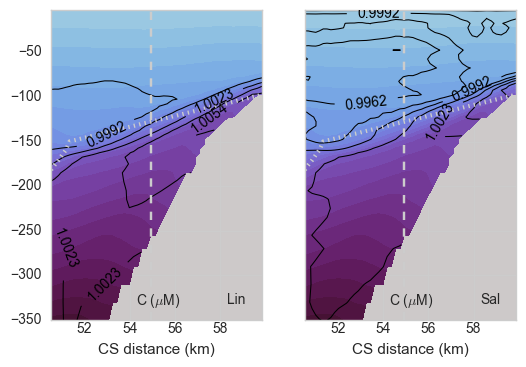

In [24]:
tracer_list = ['Tr01','Tr02'] # tracer list in Barkley run

hFacmasked = np.ma.masked_values(grid.HFacC.data, 0)
MaskC = np.ma.getmask(hFacmasked)

yslice = slice(220,270) 
xslice = 200             # x index of station DnS
tslice = slice(10,18)    # time slice during advective phase

density = call_rho(tslice,yslice,xslice)

fig ,ax = plt.subplots(1, 2, figsize = (6,4), sharey=True, sharex=True)

Tr_min = 0.97
Tr_max = 1.03 
csU2 = np.linspace(Tr_min,Tr_max,num=40)

density = call_rho(tslice,yslice,xslice)
rho_min = 1020.4-1000.0
rho_max = 1022.0-1000.0 # 1022.4 if y=230,1021.4 if y=260
csU = np.linspace(rho_min,rho_max,num=30)

ax_list = [(0),(1)]

for tracer,label,jj in zip(tracer_list,labels_Bark,ax_list):
    
    with Dataset(ptracers_file, 'r') as nbl:
        trac = nbl.variables[tracer][tslice,:48,yslice,xslice]
        trac0 = nbl.variables[tracer][0,:48,yslice,xslice]

    mesh = ax[jj].contourf(grid.Y[yslice]/1000,grid.Z[:48],
                           np.ma.array(np.nanmean(density[:,:48,:].data-1000,axis=0),
                                       mask=MaskC[:48,yslice,xslice]),
                           csU,cmap=cmo.cm.dense)
    
    CS = ax[jj].contour(grid.Y[yslice]/1000,grid.Z[:48],
                        (np.ma.array(np.nanmean(trac.data,axis=0),
                                       mask=MaskC[:48,yslice,xslice]))/trac0,
                        csU2,colors='k',linewidths=[0.75] )

    plt.clabel(CS,csU2[1::2], inline=1, fontsize=10,fmt='%1.4f')
    
    #cb = fig.colorbar(mesh,ax = ax[jj],ticks=[20.4,20.8,21.2,21.6,22],fmt='%d')
    #cb.ax.yaxis.set_tick_params(pad=1)

    ax[jj].plot(grid.Y[yslice]/1000,-grid.Depth[yslice,100],':',color='0.8',linewidth=3)
    
    ax[jj].set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))
    ax[jj].set_xlabel('CS distance (km)')
    ax[jj].text(0.4,0.05,'C ($\mu$M)',transform=ax[jj].transAxes,fontsize=10)
    ax[jj].text(0.83,0.05,label,transform=ax[jj].transAxes,fontsize=10)
    ax[jj].tick_params(axis='x', pad=1.5)
    ax[jj].axvline(grid.Y[245]/1000,linestyle='--',color='0.8')

print('Just to show lin and sal are changing very slowly with depth. Colormap is density (from 20 to 22 sigma), contours are concentration divided by initial profile')

Colormap (C(z,y,adv mean)-C(z,y,0))/C(sb)


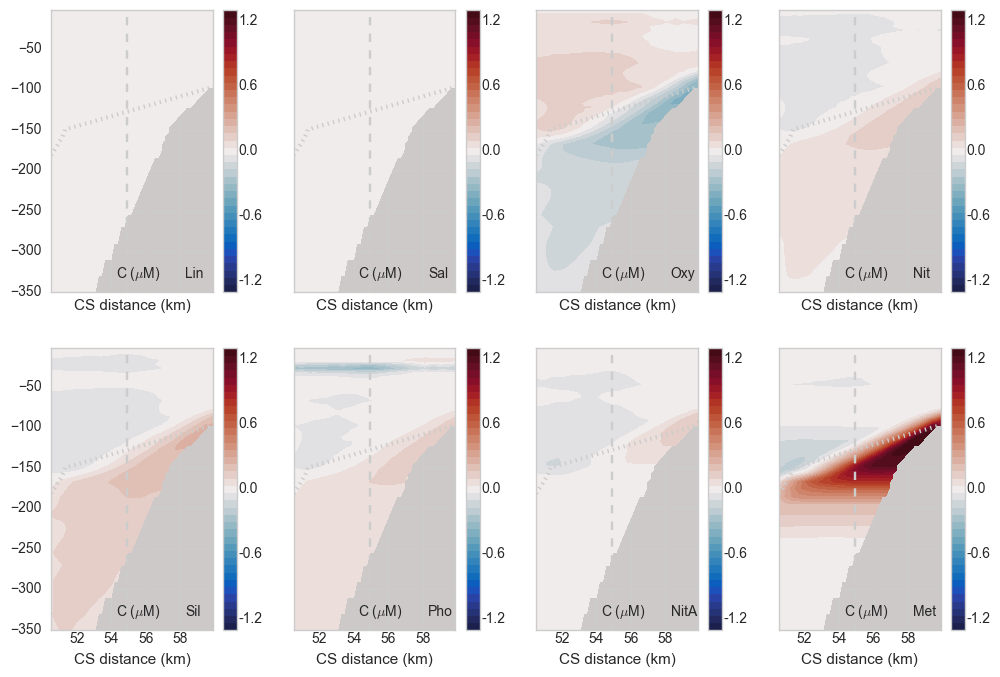

In [25]:
tracer_list = ['Tr01','Tr02','Tr03','Tr04','Tr05','Tr06','Tr07','Tr08'] # tracer list in Barkley run

hFacmasked = np.ma.masked_values(grid.HFacC.data, 0)
MaskC = np.ma.getmask(hFacmasked)

yslice = slice(220,270) 
xslice = 200             # x index of station DnS
tslice = slice(10,18)    # time slice during advective phase

fig ,ax = plt.subplots(2, 4, figsize = (12,8), sharey=True, sharex=True)

Tr_min = -1.3
Tr_max = 1.3
csU2 = np.linspace(Tr_min,Tr_max,num=40)

ax_list = [(0,0),(0,1),(0,2),(0,3),(1,0),(1,1),(1,2),(1,3)]

for tracer,label,jj in zip(tracer_list,labels_Bark,ax_list):
    
    with Dataset(ptracers_file, 'r') as nbl:
        trac = nbl.variables[tracer][tslice,:48,yslice,xslice]
        trac0 = nbl.variables[tracer][0,:48,yslice,xslice]

    mesh = ax[jj].contourf(grid.Y[yslice]/1000,grid.Z[:48],
                           (np.ma.array(np.nanmean(trac.data,axis=0),
                                       mask=MaskC[:48,yslice,xslice])-trac0)/trac0[30,0],
                           csU2,cmap=cmo.cm.balance)
    

    
    cb = fig.colorbar(mesh,ax = ax[jj],ticks=[-1.2,-0.6,0,0.6,1.2],format='%1.1f')
    cb.ax.yaxis.set_tick_params(pad=1)

    ax[jj].plot(grid.Y[yslice]/1000,-grid.Depth[yslice,100],':',color='0.8',linewidth=3)
    
    ax[jj].set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))
    ax[jj].set_xlabel('CS distance (km)')
    ax[jj].text(0.4,0.05,'C ($\mu$M)',transform=ax[jj].transAxes,fontsize=10)
    ax[jj].text(0.83,0.05,label,transform=ax[jj].transAxes,fontsize=10)
    ax[jj].tick_params(axis='x', pad=1.5)
    ax[jj].axvline(grid.Y[245]/1000,linestyle='--',color='0.8')

print('Colormap (C(z,y,adv mean)-C(z,y,0))/C(sb)')

## Parabolic profiles

Colormap (C(z,y,adv mean)-C(z,y,0))/C(sb)


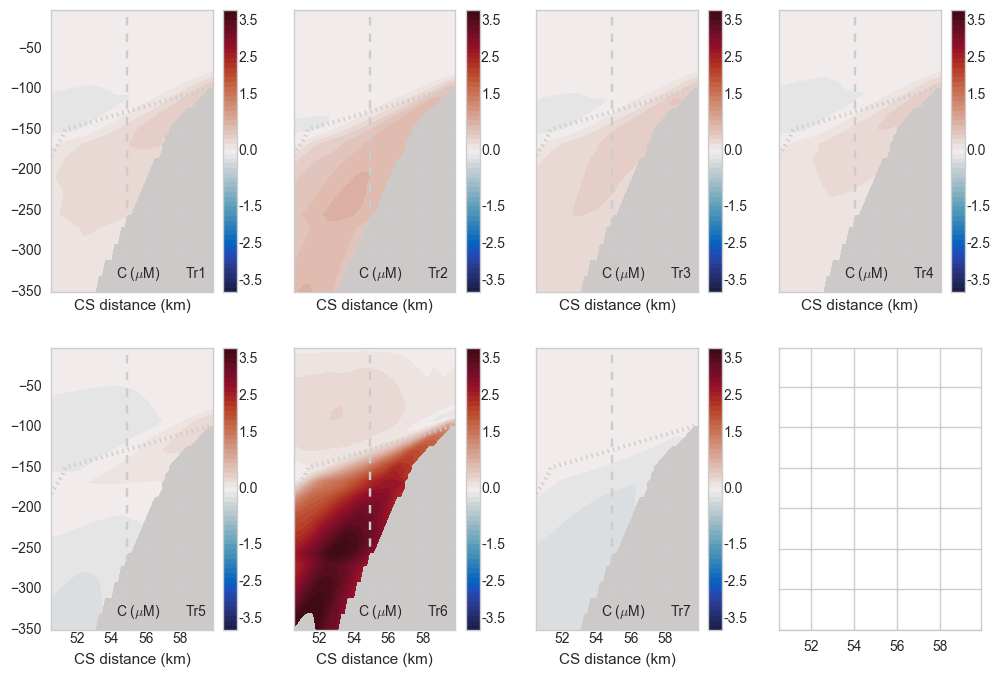

In [26]:
tracer_list = ['Tr1','Tr2','Tr3','Tr4','Tr5','Tr6','Tr7'] # tracer list in Parabolic tracers run

hFacmasked = np.ma.masked_values(grid.HFacC.data, 0)
MaskC = np.ma.getmask(hFacmasked)

yslice = slice(220,270) 
xslice = 200             # x index of station DnS
tslice = slice(10,18)    # time slice during advective phase

fig ,ax = plt.subplots(2, 4, figsize=(12,8), sharey=True, sharex=True)

Tr_min = -3.8
Tr_max = 3.8
csU2 = np.linspace(Tr_min,Tr_max,num=60)

ax_list = [(0,0),(0,1),(0,2),(0,3),(1,0),(1,1),(1,2)]

for tracer,label,jj in zip(tracer_list,labels_Para,ax_list):
    
    with Dataset(ptracers_file_parab, 'r') as nbl:
        trac = nbl.variables[tracer][tslice,:48,yslice,xslice]
        trac0 = nbl.variables[tracer][0,:48,yslice,xslice]

    mesh = ax[jj].contourf(grid.Y[yslice]/1000,grid.Z[:48],
                           (np.ma.array(np.nanmean(trac.data,axis=0),
                                       mask=MaskC[:48,yslice,xslice])-trac0)/trac0[30,0],
                           csU2,cmap=cmo.cm.balance)
    

    
    cb = fig.colorbar(mesh,ax = ax[jj],ticks=[-3.5,-2.5,-1.5,0,1.5,2.5,3.5],format='%1.1f')
    cb.ax.yaxis.set_tick_params(pad=1)

    ax[jj].plot(grid.Y[yslice]/1000,-grid.Depth[yslice,100],':',color='0.8',linewidth=3)
    
    ax[jj].set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))
    ax[jj].set_xlabel('CS distance (km)')
    ax[jj].text(0.4,0.05,'C ($\mu$M)',transform=ax[jj].transAxes,fontsize=10)
    ax[jj].text(0.83,0.05,label,transform=ax[jj].transAxes,fontsize=10)
    ax[jj].tick_params(axis='x', pad=1.5)
    ax[jj].axvline(grid.Y[245]/1000,linestyle='--',color='0.8')

print('Colormap (C(z,y,adv mean)-C(z,y,0))/C(sb)')

Colormap is density (from 20 to 22 sigma), contours are concentration divided by initial C at shelf-break depth


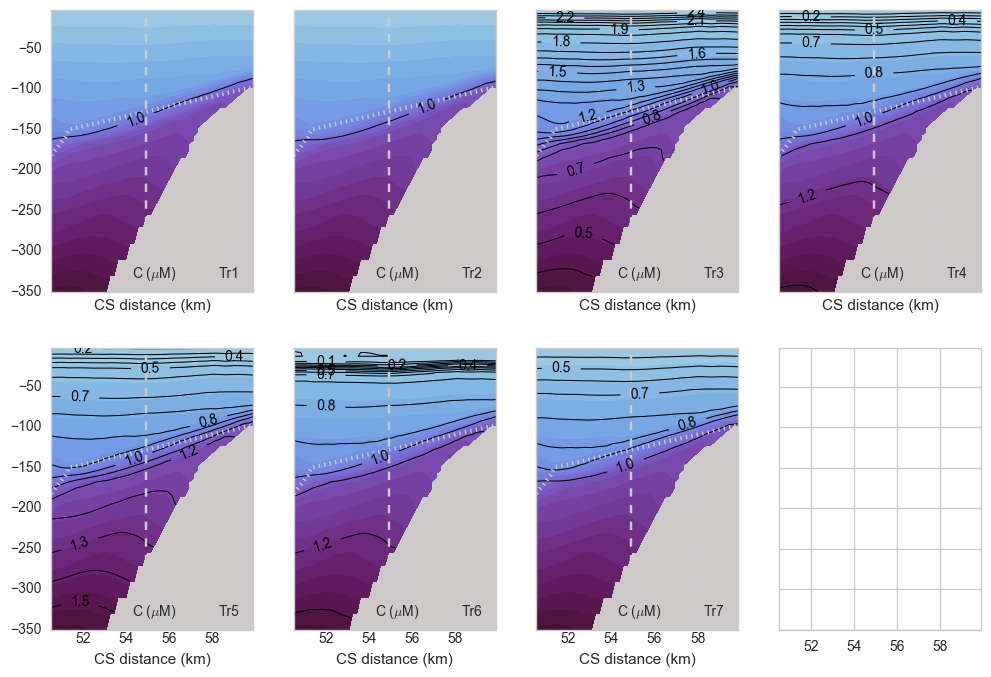

In [27]:
tracer_list = ['Tr01','Tr02','Tr03','Tr04','Tr05','Tr06','Tr07'] # tracer list in parabolic run

hFacmasked = np.ma.masked_values(grid.HFacC.data, 0)
MaskC = np.ma.getmask(hFacmasked)

yslice = slice(220,270) 
xslice = 200             # x index of station DnS
tslice = slice(10,18)    # time slice during advective phase

density = call_rho(tslice,yslice,xslice)

fig ,ax = plt.subplots(2, 4, figsize = (12,8), sharey=True, sharex=True)

Tr_min = 0
Tr_max =3 
csU2 = np.linspace(Tr_min,Tr_max,num=40)

density = call_rho(tslice,yslice,xslice)
rho_min = 1020.4-1000.0
rho_max = 1022.0-1000.0 # 1022.4 if y=230,1021.4 if y=260
csU = np.linspace(rho_min,rho_max,num=30)

ax_list = [(0,0),(0,1),(0,2),(0,3),(1,0),(1,1),(1,2),(1,3)]

for tracer,label,jj in zip(tracer_list,labels_Para,ax_list):
    
    with Dataset(ptracers_file, 'r') as nbl:
        trac = nbl.variables[tracer][tslice,:48,yslice,xslice]
        trac0 = nbl.variables[tracer][0,30,50,180]

    mesh = ax[jj].contourf(grid.Y[yslice]/1000,grid.Z[:48],
                           np.ma.array(np.nanmean(density[:,:48,:].data-1000,axis=0),
                                       mask=MaskC[:48,yslice,xslice]),
                           csU,cmap=cmo.cm.dense)
    
    CS = ax[jj].contour(grid.Y[yslice]/1000,grid.Z[:48],
                        (np.ma.array(np.nanmean(trac.data,axis=0),
                                       mask=MaskC[:48,yslice,xslice]))/trac0,
                        csU2,colors='k',linewidths=[0.75] )

    plt.clabel(CS,csU2[1::2], inline=1, fontsize=10,fmt='%1.1f')
    
    #cb = fig.colorbar(mesh,ax = ax[jj],ticks=[20.4,20.8,21.2,21.6,22],fmt='%d')
    #cb.ax.yaxis.set_tick_params(pad=1)

    ax[jj].plot(grid.Y[yslice]/1000,-grid.Depth[yslice,100],':',color='0.8',linewidth=3)
    
    ax[jj].set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))
    ax[jj].set_xlabel('CS distance (km)')
    ax[jj].text(0.4,0.05,'C ($\mu$M)',transform=ax[jj].transAxes,fontsize=10)
    ax[jj].text(0.83,0.05,label,transform=ax[jj].transAxes,fontsize=10)
    ax[jj].tick_params(axis='x', pad=1.5)
    ax[jj].axvline(grid.Y[245]/1000,linestyle='--',color='0.8')


print('Colormap is density (from 20 to 22 sigma), contours are concentration divided by initial C at shelf-break depth')

Colormap is density (from 20 to 22 sigma), contours are concentration divided by initial C at shelf-break depth
This is just to show that Tr1 and Tr2 are changing very slowly with depth


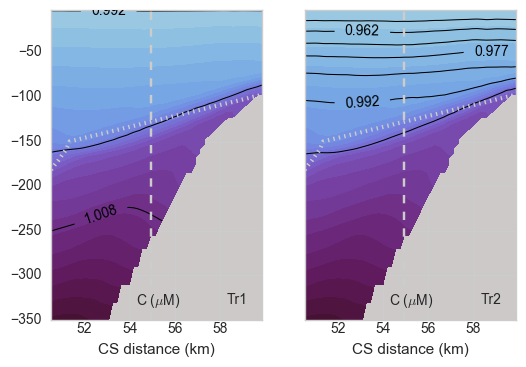

In [28]:
tracer_list = ['Tr01','Tr02'] # tracer list in parabolic run

hFacmasked = np.ma.masked_values(grid.HFacC.data, 0)
MaskC = np.ma.getmask(hFacmasked)

yslice = slice(220,270) 
xslice = 200             # x index of station DnS
tslice = slice(10,18)    # time slice during advective phase

density = call_rho(tslice,yslice,xslice)

fig ,ax = plt.subplots(1, 2, figsize = (6,4), sharey=True, sharex=True)

Tr_min = 0.8
Tr_max = 1.1 
csU2 = np.linspace(Tr_min,Tr_max,num=40)

density = call_rho(tslice,yslice,xslice)
rho_min = 1020.4-1000.0
rho_max = 1022.0-1000.0 # 1022.4 if y=230,1021.4 if y=260
csU = np.linspace(rho_min,rho_max,num=30)

ax_list = [0,1]

for tracer,label,jj in zip(tracer_list,labels_Para,ax_list):
    
    with Dataset(ptracers_file, 'r') as nbl:
        trac = nbl.variables[tracer][tslice,:48,yslice,xslice]
        trac0 = nbl.variables[tracer][0,30,50,180]

    mesh = ax[jj].contourf(grid.Y[yslice]/1000,grid.Z[:48],
                           np.ma.array(np.nanmean(density[:,:48,:].data-1000,axis=0),
                                       mask=MaskC[:48,yslice,xslice]),
                           csU,cmap=cmo.cm.dense)
    
    CS = ax[jj].contour(grid.Y[yslice]/1000,grid.Z[:48],
                        (np.ma.array(np.nanmean(trac.data,axis=0),
                                       mask=MaskC[:48,yslice,xslice]))/trac0,
                        csU2,colors='k',linewidths=[0.75] )

    plt.clabel(CS,csU2[1::2], inline=1, fontsize=10,fmt='%1.3f')
    
    #cb = fig.colorbar(mesh,ax = ax[jj],ticks=[20.4,20.8,21.2,21.6,22],fmt='%d')
    #cb.ax.yaxis.set_tick_params(pad=1)

    ax[jj].plot(grid.Y[yslice]/1000,-grid.Depth[yslice,100],':',color='0.8',linewidth=3)
    
    ax[jj].set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))
    ax[jj].set_xlabel('CS distance (km)')
    ax[jj].text(0.4,0.05,'C ($\mu$M)',transform=ax[jj].transAxes,fontsize=10)
    ax[jj].text(0.83,0.05,label,transform=ax[jj].transAxes,fontsize=10)
    ax[jj].tick_params(axis='x', pad=1.5)
    ax[jj].axvline(grid.Y[245]/1000,linestyle='--',color='0.8')


print('Colormap is density (from 20 to 22 sigma), contours are concentration divided by initial C at shelf-break depth')
print('This is just to show that Tr1 and Tr2 are changing very slowly with depth')